# Doc2vec,Tsne,SpotifySongs,Genres

### Loading Libraries

In [1]:
import numpy as np 
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import re
import os
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import string
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from collections import Counter


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prediction
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# D2V
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Erase Warnings
import warnings
warnings.filterwarnings("ignore")


### Loading Dataset

In [7]:
songs_df = pd.read_csv("./final_spotify_songs.csv")

In [3]:
songs_df.shape

(18454, 25)

In [4]:
songs_df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [5]:
songs_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


In [6]:
songs_df.shape, songs_df.columns, songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

((18454, 25),
 Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'language'],
       dtype='object'),
 None)

## data Cleaning

In [8]:
#check null values
pd.isnull(songs_df).sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

### Data Loading and Description

In [9]:
songs_df  = songs_df.drop(['track_id','track_album_id','playlist_id','track_album_release_date'] ,axis=1) 
songs_df.head(5)

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,Pinoy Classic Rock,rock,classic rock,0.682,0.401,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,0.880,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,0.652,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,0.378,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,0.887,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


# Genre based analysis

### Data cleaning and Data Pre-Procesing 

In [10]:
songs_df.playlist_subgenre.drop_duplicates() 

0                  classic rock
1                     hard rock
2                new jack swing
3                      neo soul
4                     dance pop
5            urban contemporary
8                      big room
9                       hip pop
10                    latin pop
11              indie poptimism
13                 gangster rap
15                   album rock
17                post-teen pop
23                         trap
24                latin hip hop
27             southern hip hop
28                     tropical
29                   electropop
31    progressive electro house
32                      pop edm
44                    reggaeton
47                      hip hop
54               permanent wave
94                electro house
Name: playlist_subgenre, dtype: object

In [11]:
print(songs_df.playlist_subgenre.unique().tolist())

['classic rock', 'hard rock', 'new jack swing', 'neo soul', 'dance pop', 'urban contemporary', 'big room', 'hip pop', 'latin pop', 'indie poptimism', 'gangster rap', 'album rock', 'post-teen pop', 'trap', 'latin hip hop', 'southern hip hop', 'tropical', 'electropop', 'progressive electro house', 'pop edm', 'reggaeton', 'hip hop', 'permanent wave', 'electro house']


#### Finding out the index position of particular Vector

In [12]:
songs_df["playlist_subgenre"]    

0                     classic rock
1                        hard rock
2                   new jack swing
3                         neo soul
4                        dance pop
                   ...            
18449    progressive electro house
18450                   electropop
18451                     neo soul
18452               new jack swing
18453                 classic rock
Name: playlist_subgenre, Length: 18454, dtype: object

In [13]:
genre_dict = {}
for genre_idx in range(len(songs_df["playlist_subgenre"])):
    if type(songs_df["playlist_subgenre"][genre_idx]) != str:
        genre_list = ["missing_genre"]
    else:
        genre_list = songs_df["playlist_subgenre"][genre_idx].split(",")
    for sub_genre in range(len(genre_list)):
        sg = genre_list[sub_genre].strip().replace("'", "").lower()
        if sg not in genre_dict.keys():
            genre_dict[sg] = [genre_idx]
        else:
            vals = genre_dict.get(sg)
            vals.append(genre_idx)
            genre_dict[sg] = vals

In [14]:
genre_dict

{'classic rock': [0,
  57,
  64,
  76,
  77,
  103,
  132,
  188,
  189,
  195,
  206,
  208,
  223,
  251,
  260,
  267,
  277,
  304,
  305,
  361,
  376,
  389,
  427,
  432,
  435,
  453,
  462,
  470,
  495,
  502,
  515,
  520,
  529,
  617,
  625,
  665,
  680,
  688,
  690,
  727,
  752,
  792,
  796,
  816,
  819,
  857,
  861,
  868,
  871,
  872,
  906,
  912,
  931,
  932,
  942,
  943,
  967,
  968,
  1023,
  1040,
  1055,
  1063,
  1108,
  1123,
  1198,
  1237,
  1246,
  1247,
  1250,
  1270,
  1317,
  1335,
  1372,
  1399,
  1417,
  1419,
  1433,
  1442,
  1451,
  1458,
  1488,
  1489,
  1502,
  1544,
  1557,
  1632,
  1689,
  1707,
  1722,
  1734,
  1735,
  1743,
  1744,
  1756,
  1759,
  1797,
  1815,
  1817,
  1828,
  1851,
  1866,
  1889,
  1934,
  1980,
  2010,
  2046,
  2049,
  2112,
  2135,
  2139,
  2195,
  2213,
  2216,
  2303,
  2344,
  2358,
  2362,
  2364,
  2367,
  2378,
  2391,
  2395,
  2398,
  2409,
  2428,
  2458,
  2464,
  2492,
  2572,
  2575,
  2577,


In [ ]:
#From here i need to work exactly
#try to transform the ids from nummeric to string: e.g. instead of 159 put "159", this way for each genre you have a list of characters ids \n",
#now use the gensim, imagine each list is a sentences and all of them together make a document. so use the doc2vec to learn this document.\n",
#since doc2vec tokenize each sentece to the words, so after getting the embedded vectors for each word, you can sum(or average) the elements of vectors \n",
#to get the vector for each sentence, this way you can compare the outcome vectors for each genre \n"

In [ ]:
# song recommendation with genres and languages.

In [15]:
uniq_genre_list = []
for genre_idx in range(len(songs_df["playlist_subgenre"])):
    if type(songs_df["playlist_subgenre"][genre_idx]) != str:
        genre_list = ["missing_genre"]
    else:
        genre_list = songs_df["playlist_subgenre"][genre_idx].split(",")
    for sub_genre in range(len(genre_list)):
        sg = genre_list[sub_genre].strip().replace("'", "").lower()
        if sg == "":
            continue
        uniq_genre_list.append(sg)

ugl = list(set(uniq_genre_list))

In [16]:
len(ugl)

24

In [ ]:
ugl.sort()
print(ugl)

#### analysing languages

In [17]:
lang_list = list(set(songs_df["language"]))

In [18]:
from collections import Counter

lang_counts = Counter(list(songs_df["language"]))

In [19]:
keep_lang = []
lang_counts_names = list(lang_counts.keys())
idx = 0
for value in lang_counts.values():
    if value < 100:
        idx += 1
        continue
    else:
        keep_lang.append(lang_counts_names[idx])
        idx += 1

In [20]:
songs_df_subset = songs_df[songs_df["language"].isin(keep_lang)]

In [21]:
songs_df_subset

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,0.880,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,0.652,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,0.378,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,0.887,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,urban contemporary,r&b,urban contemporary,0.496,0.639,...,-6.157,1,0.0550,0.28000,0.000000,0.0975,0.305,147.764,224720,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,NAV,PROJECT: Contemporary,r&b,urban contemporary,0.744,0.715,...,-6.103,1,0.3510,0.10100,0.000000,0.0919,0.340,154.962,179773,en
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,♥ EDM LOVE 2020,edm,progressive electro house,0.479,0.800,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),10er Playlist,pop,electropop,0.963,0.603,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),Sexy Soul 2020,r&b,neo soul,0.458,0.540,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en


In [22]:
songs_df_subset = songs_df_subset[~(songs_df_subset["language"].isna())]

In [ ]:
len(songs_df_subset)

In [23]:
specific_vectors = []
for lang in keep_lang:
    print(f"Processing: {lang}")
    lang_subset = songs_df_subset[songs_df_subset["language"] == lang]
    lyrics = [x.lower() for x in lang_subset["lyrics"]]
    idx = lang_subset.index
    if type(lang) != str:
        continue
    else:
        print(f"Starting Doc2Vec for {lang}")
        documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(lyrics)]
        model = Doc2Vec(documents, vector_size=150, window=3, min_count=1, workers=4)
        print(f"Finished Doc2Vec for {lang}")
        lyrics_vecs = model.docvecs
        idx_vect = list(zip(idx, lyrics_vecs))
        specific_vectors += idx_vect
        print(f"Finished {lang}")

Processing: en
Starting Doc2Vec for en
Finished Doc2Vec for en
Finished en
Processing: it
Starting Doc2Vec for it
Finished Doc2Vec for it
Finished it
Processing: es
Starting Doc2Vec for es
Finished Doc2Vec for es
Finished es
Processing: pt
Starting Doc2Vec for pt
Finished Doc2Vec for pt
Finished pt
Processing: nan
Processing: de
Starting Doc2Vec for de
Finished Doc2Vec for de
Finished de


In [ ]:
len(specific_vectors)

In [24]:
specific_vectors.sort()

In [25]:
to_df = [x[1] for x in specific_vectors]

In [26]:
#len(to_df) +260 

In [27]:
songs_df_subset["vectors"] = to_df

In [28]:
songs_df_subset["vectors"].iloc[0]

array([-0.05323024, -0.0377727 ,  0.310031  ,  0.40999976, -0.2474757 ,
       -0.09661134, -0.04103664, -0.07772744,  0.00553286,  0.00374353,
        0.26724702, -0.12971173, -0.10296692, -0.09954632, -0.08362175,
        0.10668141,  0.13727307,  0.03663899, -0.13648659, -0.07644052,
       -0.00128595,  0.00297489,  0.08528601, -0.06537061,  0.01024234,
        0.05836488, -0.1215935 , -0.39085367,  0.19543877, -0.08982868,
       -0.08742752,  0.08153239, -0.24424179, -0.12561737,  0.04481189,
       -0.12194327, -0.30226126, -0.0629557 ,  0.16844556, -0.02217977,
       -0.02676455, -0.4044748 , -0.08429344,  0.01885174,  0.14803067,
        0.1051035 ,  0.02704889,  0.17164008, -0.04887209, -0.17944367,
       -0.14753444, -0.0147064 ,  0.11769355,  0.05624175, -0.10428091,
        0.1943742 ,  0.09096993, -0.16350096, -0.1713199 ,  0.15144722,
        0.09187412,  0.22083223, -0.08443405, -0.07865302, -0.03744733,
        0.02805424, -0.18071829,  0.1088341 ,  0.1081393 , -0.02

In [ ]:
# From here, get initial groupings with tSNE
# tSNE can produce projections of high dim data to 2 (or 3) dims. 
# Run k-means or some other (un)supervised algo to produce groupings
# Look at the lyrics within the groups to see if they make sense together
# Reiterate and improve. See if normalization will need to happen
# and/or see how to combine the other song features to influence
# the groupings. 

In [ ]:
songs_df_subset.shape

In [31]:
eng = songs_df_subset[songs_df_subset["language"] == "en"]

In [ ]:
# playlist_genre (main), playlist_subgenre (just for doc purposes)
# Features: ['track_popularity', danceability', 'energy', 'key', 'loudness',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'duration_ms']
# Lyric_features: ["vectors"]

In [ ]:
# Blind grouping
# Disregard the genre, just group the songs based on the auditory features.

# A B C D E F G
# A# b# ...

# C <-> G <-> D <-> A <-> E <-> B <-> F <-> C

# Mode = major, keep the key
# If the mode is minor, shift key down by 3.
# C, mode = minor :: C-minor :: same notes as A-major

In [39]:
features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

In [147]:
genre_df = eng["playlist_genre"]

In [ ]:
feature_vector = eng[features]

In [153]:
uniq_genre = list(set(genre_df))

In [154]:
colors = get_colors(len(uniq_genre), pastel_factor = 0.2)
color_hex = [get_hex(x) for x in colors]


In [159]:
color_grps = [f"Cluster {uniq_genre[x]}" for x in range(len(color_hex))]

In [160]:
color_grps

['Cluster rap',
 'Cluster rock',
 'Cluster r&b',
 'Cluster latin',
 'Cluster edm',
 'Cluster pop']

In [38]:
# K-Means Clustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
# For visualizing the clusters
import matplotlib.pyplot as plt
from kneed import KneeLocator


In [47]:
# Can use an elbow/knee graph too to determine this. 
# inertiae = []
# for k in range(1, 21):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_vector)
#     inertiae.append(kmeans.inertia_)

<Figure size 360x360 with 0 Axes>

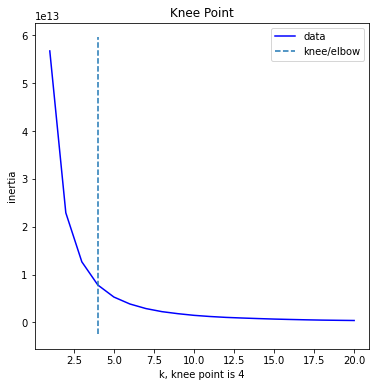

In [49]:
# Plot
# i = np.arange(1, 21)
# knee = KneeLocator(i, inertiae, 
#                     S = 1, curve = "convex", 
#                     direction = "decreasing", 
#                     interp_method = "interp1d")
# fig2 = plt.figure(figsize=(5, 5))
# knee.plot_knee()
# plt.xlabel(f"k, knee point is {knee.knee}")
# plt.ylabel("inertia")
# plt.show()

In [145]:
tsne = TSNE(n_components=3, verbose=1, random_state=0)
w = tsne.fit_transform(feature_vector) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17660 samples in 0.002s...
[t-SNE] Computed neighbors for 17660 samples in 1.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17660
[t-SNE] Computed conditional probabilities for sample 2000 / 17660
[t-SNE] Computed conditional probabilities for sample 3000 / 17660
[t-SNE] Computed conditional probabilities for sample 4000 / 17660
[t-SNE] Computed conditional probabilities for sample 5000 / 17660
[t-SNE] Computed conditional probabilities for sample 6000 / 17660
[t-SNE] Computed conditional probabilities for sample 7000 / 17660
[t-SNE] Computed conditional probabilities for sample 8000 / 17660
[t-SNE] Computed conditional probabilities for sample 9000 / 17660
[t-SNE] Computed conditional probabilities for sample 10000 / 17660
[t-SNE] Computed conditional probabilities for sample 11000 / 17660
[t-SNE] Computed conditional probabilities for sample 12000 / 17660
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'Vector_Viz')]

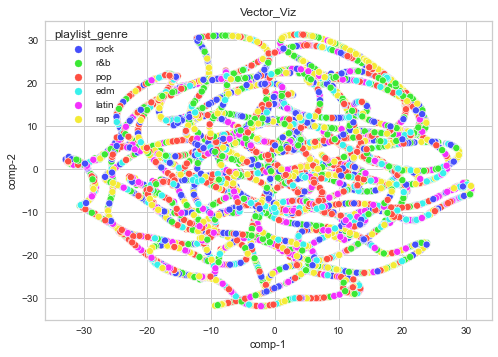

In [163]:
feature_vector["comp-1"] = w[:,0]
feature_vector["comp-2"] = w[:,1]
# feature_vector["comp-3"] = w[:,2]
sns.scatterplot(x="comp-1", y="comp-2", hue=genre_df,
                palette=color_hex,
                data=feature_vector).set(title="Vector_Viz")

In [151]:
len(grp)

17660

In [ ]:
#Build corpus

In [ ]:
corpus_text = "n".join(np.str(lyrics))

# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

In [ ]:
temp

In [ ]:
np.asarray(temp).shape

In [ ]:
corpus_text = "n".join(np.array(ugl))

# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp1 = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp1.append(j.lower())

In [ ]:
temp1

In [ ]:
trainx_reshape = np.reshape(temp,(-1,1))
trainy_reshape= np.reshape(temp1,(-1,1))
trainx_reshape

In [ ]:
trainy_reshape

### Label Encoding


In [ ]:
scale = LabelEncoder()
train_x = scale.fit_transform(trainx_reshape)

### One Hot Encoding

In [ ]:
onecoder = OneHotEncoder()
train_x = onecoder.fit_transform(trainx_reshape)

## K Means Clustering


In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
#Before we work on model lets make a copy of our dataset

In [ ]:
# creating a copy of the dataset
df_cluster = songs_df.copy()
df_cluster = df_cluster.iloc[:300]

In [ ]:
# creating a dataframe without the categorical features
X = df_cluster.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].values

In [ ]:
print(X.shape)
df_cluster.head(10)

# Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
# Find where the nan lyrics are:
bad_idx = []
for lyric in range(len(songs_df["lyrics"])):
    lyrics = songs_df["lyrics"][lyric]
    if type(lyrics) != str:
        bad_idx.append(lyric)
    else:
        continue

In [ ]:
songs_df.loc[bad_idx[1]]

In [ ]:
doc_lyrics = songs_df[~(songs_df["lyrics"].index.isin(bad_idx))]

In [ ]:
doc_lyrics = doc_lyrics.reset_index(drop = True)

In [ ]:
doc_lyrics_list = doc_lyrics["lyrics"]

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(doc_lyrics['lyrics'])]


In [ ]:
documents[1]

In [ ]:
model = Doc2Vec(documents, vector_size=150, window=3, min_count=1, workers=4)

In [ ]:
model.docvecs[len(documents) -1]

In [ ]:
documents[0][0]

In [ ]:
dir(model)

### Tsne Implementation

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show();

In [ ]:
tsne_plot(model)


### Visualization  

In [ ]:
rcParams['figure.figsize'] = 10, 8
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(songs_df['playlist_subgenre'].values))

plt.imshow(wordcloud, interpolation = 'bilinear');

In [ ]:
rcParams['figure.figsize'] = 10, 8
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(songs_df['Artist'].values))

plt.imshow(wordcloud, interpolation = 'bilinear');

In [ ]:
sns.jointplot(x='Danceability', y='Popularity', 
              data=songs_df, kind='scatter');

In [ ]:
sns.jointplot(x='Acousticness', y='Popularity', 
              data=songs_df, kind='scatter');

In [ ]:
sns.jointplot(x='Liveness', y='Popularity', 
              data=songs_df, kind='scatter');